In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn import linear_model

In [61]:
df=pd.read_csv(r"C:\Users\Sparsh\Desktop\data science PROJECTS\hiring.csv")

In [62]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [63]:
df=df.rename(columns={"test_score(out of 10)": "test_score", "interview_score(out of 10)": "interview_score"})
df

,experience,test_score,interview_score,salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [64]:
df.experience=df.experience.fillna("zero")

In [65]:
from word2number import w2n

In [66]:
df.experience=df.experience.apply(w2n.word_to_num)
df.experience

0     0
1     0
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [67]:
df.test_score.median()

8.0

In [68]:
df.test_score=df.test_score.fillna(df.test_score.mean())

In [69]:
df

,experience,test_score,interview_score,salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


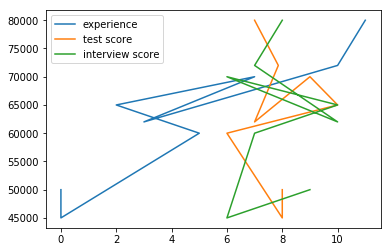

In [70]:
plt.plot(df[["experience"]],df[['salary($)']],label="experience")
plt.plot(df[["test_score"]],df[['salary($)']],label="test score")
plt.plot(df[["interview_score"]],df[['salary($)']],label="interview score")
plt.legend()


In [71]:
reg=linear_model.LinearRegression();
reg.fit(df[['experience','test_score','interview_score']],df["salary($)"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
reg.predict([[2,9,6]])

array([53290.89255945])

In [73]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(df[['experience','test_score','interview_score']],df[['salary($)']],test_size=.2)

In [86]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
reg.predict(x_test)

array([[47359.11110624],
       [61234.35697106]])

In [89]:
reg.score(x_test,y_test)*100

90.12726368348441